## Sociolinguistics of Online Communication
### The effect of age in perception and interpretation of online communication’s features

#### Analysis of the dataset
Author: Lucrezia Labardi

### Import of data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
socio = pd.read_csv("socio94.csv")
socio.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Emoji_func3,Emoji_func_final,Opinion1,Opinion2,Opinion3,Opinion4,Laugh,Reverse,Smiley,Melted
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Consideralo fatto🫡,Hai avuto difficoltà ad interpretarle?,Il linguaggio che usi nei messaggi è... rispet...,Se qualcuno commette un errore grammaticale in...,Pensi che le persone che usano molto i social ...,Ritieni che per messaggio si possa parlare di ...,😂,🙃,🙂,🫠
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID53""}","{""ImportId"":""QID48""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}","{""ImportId"":""QID34""}","{""ImportId"":""QID35""}","{""ImportId"":""QID40_TEXT""}","{""ImportId"":""QID41_TEXT""}","{""ImportId"":""QID42_TEXT""}","{""ImportId"":""QID43_TEXT""}"
2,2023-12-10 15:46:59,2023-12-10 16:08:46,IP Address,100,1307,True,2023-12-10 16:08:47,R_2CptbEbNORrxbqL,anonymous,IT,...,Enfatizzare il significato letterale del messa...,Sì,Uguale,Mi dà fastidio,No,"No, preferisco parlare di alcune cose di persona",Tristezza,Giornata nera,Tutto ok.,Giornata splendida
3,2023-12-10 16:02:49,2023-12-10 16:09:05,IP Address,100,375,True,2023-12-10 16:09:05,R_3rG83XixhkJviEz,anonymous,IT,...,Enfatizzare il significato letterale del messa...,No,Uguale,Mi dà fastidio,No,"No, preferisco parlare di alcune cose di persona",Ridere,Personalmente la utilizzo per dire che non son...,Felice,Mi sciolgo ma in senso anche di “sono stanco”
4,2023-12-10 16:07:18,2023-12-10 16:14:30,IP Address,100,432,True,2023-12-10 16:14:31,R_3KZpXBxILOTR1rz,anonymous,IT,...,Rendere il messaggio più giocoso,No,Più formale,Non ci faccio caso,No,"No, preferisco parlare di alcune cose di persona",Risata,Confusione,Felice,Sfinito


### Data cleaning

In [3]:
socio["Gender"].value_counts()

Femmina                            72
Maschio                            19
Non binario                         2
In quale genere ti identifichi?     1
{"ImportId":"QID3"}                 1
Preferisco non rivelarlo            1
Name: Gender, dtype: int64

In [4]:
socio = socio[socio["Gender"]=="Femmina"]
socio = socio[socio["Age"]!="Più di 70"]

In [5]:
socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 3 to 94
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   StartDate               67 non-null     object
 1   EndDate                 67 non-null     object
 2   Status                  67 non-null     object
 3   Progress                67 non-null     object
 4   Duration (in seconds)   67 non-null     object
 5   Finished                67 non-null     object
 6   RecordedDate            67 non-null     object
 7   ResponseId              67 non-null     object
 8   DistributionChannel     67 non-null     object
 9   UserLanguage            67 non-null     object
 10  Gender                  67 non-null     object
 11  Age                     67 non-null     object
 12  Online_behaviour        67 non-null     object
 13  Emoji_usage             67 non-null     object
 14  Emoji_favourite         67 non-null     object
 15  Emoji_fa

In [6]:
mapping_age = {"Meno di 20": '0-20', "Più di 70": '70+'}
mapping_gender = {"Femmina": "Female", "Maschio": "Male", "Non binario": "Non-binary"}

socio['Age'] = socio['Age'].replace(mapping_age)
socio['Gender'] = socio['Gender'].replace(mapping_gender)

In [7]:
socio["Age"].value_counts()

50-60    19
40-50    18
20-30    15
0-20      7
60-70     5
30-40     3
Name: Age, dtype: int64

In [8]:
agemap = {"0-20": "10-30", "20-30": "10-30", "30-40": "30-50", "40-50": "30-50", "50-60": "50-70", "60-70": "50-70"}
socio["Age"] = socio["Age"].replace(agemap)

In [9]:
socio["Age"].value_counts() # final distribution of age

50-70    24
10-30    22
30-50    21
Name: Age, dtype: int64

### Online Behaviour

In [10]:
# first dataset with questions about online behaviour
socio_general = socio[["Age", "Online_behaviour", "Emoji_usage", "Emoji_favourite", "Emoji_favourite_1_TEXT", "Emoji_adapt", "Emoji_adapt_why"]]
socio_general

,Age,Online_behaviour,Emoji_usage,Emoji_favourite,Emoji_favourite_1_TEXT,Emoji_adapt,Emoji_adapt_why
3,10-30,Nella media,Spesso,Si,🥹😂👀,Sì,Sia dal genere che dall'età
5,10-30,Nella media,Spesso,No,NaN,No,NaN
9,50-70,Meno della media,Spesso,No,NaN,No,NaN
10,10-30,Nella media,"Si, nella maggior parte dei messaggi",Si,🥰,Sì,Dalla sua età
11,10-30,Nella media,Raramente,Si,❤️,Sì,Dalla sua età
...,...,...,...,...,...,...,...
90,10-30,Nella media,Raramente,Non so,NaN,Sì,Sia dal genere che dall'età
91,10-30,Nella media,"Si, nella maggior parte dei messaggi",Si,😂,No,NaN
92,10-30,Nella media,Spesso,Si,😀,No,NaN
93,10-30,Nella media,Spesso,Si,🥸,Sì,Dalla sua età


In [12]:
# translation
mapping1 = {"Nella media": "On average", "Meno della media": "Less than average", "Più della media": "More than average"}
mapping2 = {"Si, nella maggior parte dei messaggi": "Yes, in most of the texts", "Raramente": "Rarely", "Spesso": "Often", "Mai": "Never"}
mapping3 = {"Si": "Yes", "Sì": "Yes", "Non so": "I don't know"}
mapping4 = {"Dal suo genere": "Gender", "Dalla sua età": "Age", "Sia dal genere che dall'età": "Both gender and age", "Non so": "I don't know"}
socio_general['Online_behaviour'] = socio_general['Online_behaviour'].replace(mapping1)
socio_general['Emoji_usage'] = socio_general['Emoji_usage'].replace(mapping2)
socio_general['Emoji_favourite'] = socio_general['Emoji_favourite'].replace(mapping3)
socio_general['Emoji_adapt'] = socio_general['Emoji_adapt'].replace(mapping3)
socio_general['Emoji_adapt_why'] = socio_general['Emoji_adapt_why'].replace(mapping4)

C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2009507865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_general['Online_behaviour'] = socio_general['Online_behaviour'].replace(mapping1)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2009507865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_general['Emoji_usage'] = socio_general['Emoji_usage'].replace(mapping2)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2009507865.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

In [13]:
socio_general

,Age,Online_behaviour,Emoji_usage,Emoji_favourite,Emoji_favourite_1_TEXT,Emoji_adapt,Emoji_adapt_why
3,10-30,On average,Often,Yes,🥹😂👀,Yes,Both gender and age
5,10-30,On average,Often,No,NaN,No,NaN
9,50-70,Less than average,Often,No,NaN,No,NaN
10,10-30,On average,"Yes, in most of the texts",Yes,🥰,Yes,Age
11,10-30,On average,Rarely,Yes,❤️,Yes,Age
...,...,...,...,...,...,...,...
90,10-30,On average,Rarely,I don't know,NaN,Yes,Both gender and age
91,10-30,On average,"Yes, in most of the texts",Yes,😂,No,NaN
92,10-30,On average,Often,Yes,😀,No,NaN
93,10-30,On average,Often,Yes,🥸,Yes,Age


In [14]:
socio_general["Online_behaviour"].value_counts()

On average           45
Less than average    17
More than average     5
Name: Online_behaviour, dtype: int64

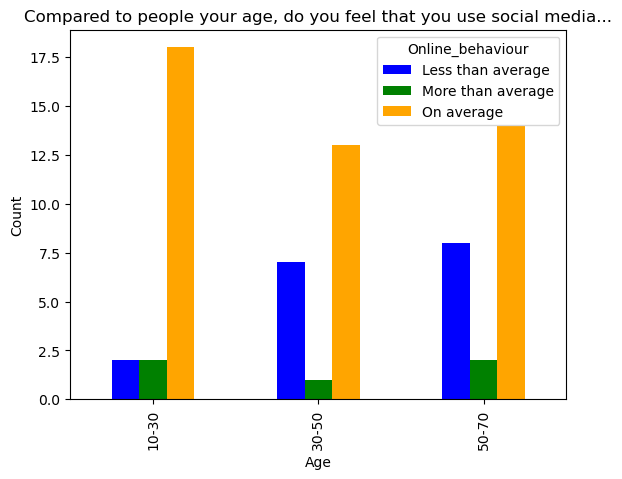

In [15]:
conteggi_per_eta = socio_general.groupby(['Age', 'Online_behaviour']).size().unstack()

# Colori per le colonne
colori = ['blue', 'green', 'orange', 'red', 'purple']  # Aggiungi altri colori se necessario

# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Compared to people your age, do you feel that you use social media...')

# Mostra il grafico
plt.show()

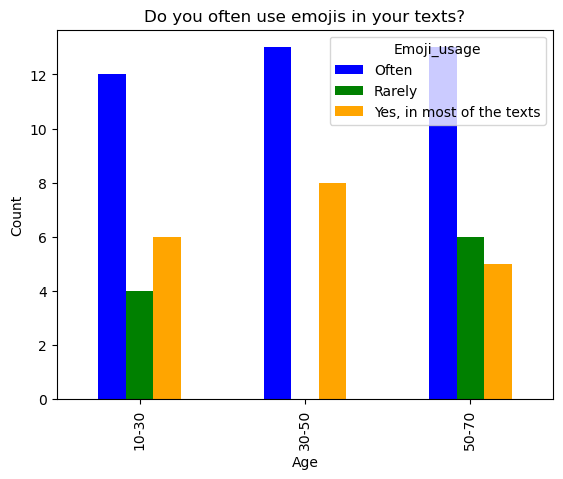

In [16]:
conteggi_per_eta = socio_general.groupby(['Age', 'Emoji_usage']).size().unstack()

# Colori per le colonne
colori = ['blue', 'green', 'orange', 'red', 'purple']  # Aggiungi altri colori se necessario

# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Do you often use emojis in your texts?')

# Mostra il grafico
plt.show()

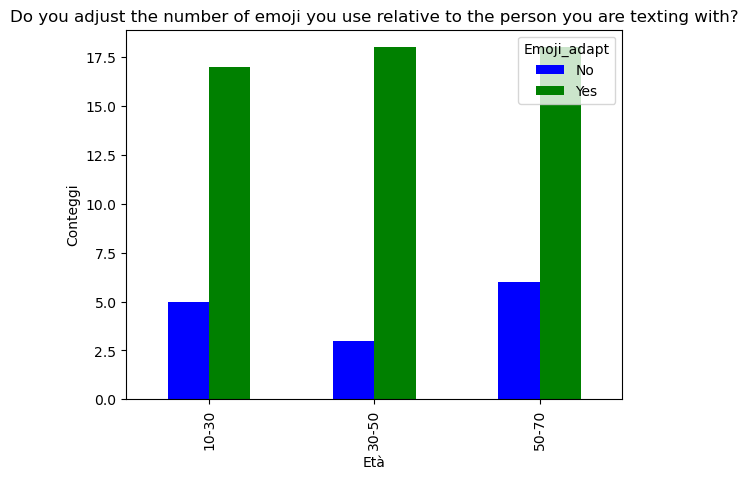

In [17]:
conteggi_per_eta = socio_general.groupby(['Age', 'Emoji_adapt']).size().unstack()

# Colori per le colonne
colori = ['blue', 'green', 'orange', 'red', 'purple']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Età')
plt.ylabel('Conteggi')
plt.title('Do you adjust the number of emoji you use relative to the person you are texting with?')

# Mostra il grafico
plt.show()

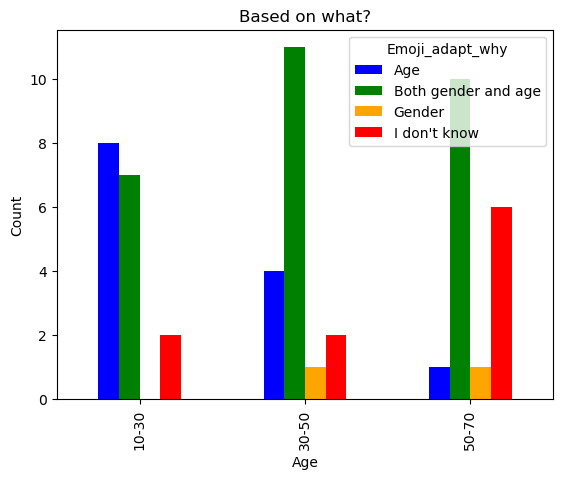

In [18]:
conteggi_per_eta = socio_general.groupby(['Age', 'Emoji_adapt_why']).size().unstack()

# Colori per le colonne
colori = ['blue', 'green', 'orange', 'red', 'purple']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Based on what?')

# Mostra il grafico
plt.show()

In [19]:
socio_general.groupby("Age")["Emoji_favourite"].value_counts()

Age    Emoji_favourite
10-30  Yes                15
       No                  4
       I don't know        3
30-50  Yes                11
       No                  9
       I don't know        1
50-70  Yes                16
       No                  8
Name: Emoji_favourite, dtype: int64

In [20]:
socio_general["Emoji_favourite_1_TEXT"].value_counts()

😊                                3
😘                                3
🤣                                2
🥰                                2
😍                                2
😅                                2
😂                                2
🥹😂👀                              1
🥰😘😊👍                             1
Bacino                           1
🥺                                1
🍀                                1
La faccia sorridente             1
🤩                                1
Faccina che ride                 1
😋                                1
😀                                1
🥸                                1
Un fiore                         1
Quella che sorride               1
👻                                1
🫠                                1
sorriso                          1
Faccia con occhiolino            1
La faccina sorridente            1
😁                                1
Occhiolino                       1
❤                                1
Quella che piange da

In [21]:
mapping = {"Bacino": '😘', "La faccina sorridente ": '😊', "La faccia sorridente ": '😊' ,"Faccina che ride": '😊', "Quella che sorride ": '😊', "sorriso": '😊', "Quella che piange dal ridere ": '😂', "Faccia con occhiolino": '😉', "Occhiolino": '😉'}
mapping2 = {"Ti voglio bene ": "I love you", "Un fiore": "A flower"}

socio_general['Emoji_favourite_1_TEXT'] = socio_general['Emoji_favourite_1_TEXT'].replace(mapping)
socio_general['Emoji_favourite_1_TEXT'] = socio_general['Emoji_favourite_1_TEXT'].replace(mapping2)

C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\631204085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_general['Emoji_favourite_1_TEXT'] = socio_general['Emoji_favourite_1_TEXT'].replace(mapping)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\631204085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_general['Emoji_favourite_1_TEXT'] = socio_general['Emoji_favourite_1_TEXT'].replace(mapping2)


In [22]:
socio_general["Emoji_favourite_1_TEXT"].value_counts()

😊             8
😘             4
😂             3
😍             2
😉             2
🤣             2
🥰             2
😅             2
🥹😂👀           1
🥰😘😊👍          1
🥸             1
😀             1
😋             1
🍀             1
🤩             1
🥺             1
😁             1
A flower      1
👻             1
🫠             1
❤             1
I love you    1
🫶             1
❤️            1
😌             1
Name: Emoji_favourite_1_TEXT, dtype: int64

In [23]:
socio_general.groupby('Age')["Emoji_favourite_1_TEXT"].value_counts()

Age    Emoji_favourite_1_TEXT
10-30  🥰                         2
       ❤️                        1
       👻                         1
       😀                         1
       😂                         1
       😊                         1
       😋                         1
       😌                         1
       🤣                         1
       🥸                         1
       🥹😂👀                       1
       🥺                         1
       🫠                         1
       🫶                         1
30-50  😘                         3
       😊                         2
       ❤                         1
       🍀                         1
       😂                         1
       😉                         1
       😍                         1
       🤣                         1
50-70  😊                         5
       😅                         2
       A flower                  1
       I love you                1
       😁                         1
       😂                 

### Gender

In [24]:
# gender dataset
socio_gender = socio[["Age", "Gender1", "Gender1_why", "Gender2", "Gender2_why", "Gender3", "Gender3_why", "Gender4", "Gender4_why", "Gender5", "Gender5_why", "Gender_opinion_1", "Gender_opinion_2", "Gender_opinion_3", "Gender_opinion_4", "Gender_opinion_5", "Gender_opinion_6"]]
socio_gender

,Age,Gender1,Gender1_why,Gender2,Gender2_why,Gender3,Gender3_why,Gender4,Gender4_why,Gender5,Gender5_why,Gender_opinion_1,Gender_opinion_2,Gender_opinion_3,Gender_opinion_4,Gender_opinion_5,Gender_opinion_6
3,10-30,Femmina,Solitamente le persone di sesso femminile tend...,Non so,"Viene usata una sola emoji, mi sembra abbastan...",Femmina,La seconda emoticon viene utilizzata più dalle...,Non so,Può essere un messaggio scritto da chiunque,Maschio,Sembra il messaggio scritto da un ragazzo alla...,Vero,Falso,Vero,Vero,Falso,Vero
5,10-30,Femmina,"Presenza di eii, cuoricino e emoji che tenta d...",Maschio,"Easy, veloce ma gentile",Maschio,Le manine così tutti i miei amici maschi,Maschio,Scrive così solo il mio migliore amico,Femmina,Tutti sti cuori,Non so,Falso,Falso,Vero,Falso,Vero
9,50-70,Non so,Perché credo che possa essere scritto sia da u...,Non so,Idem come ho scritto nella domanda precedente,Non so,NaN,Non so,NaN,Maschio,NaN,Vero,Non so,Non so,Non so,Vero,Non so
10,10-30,Non so,NaN,Femmina,✨ emoji utilizzata più da ragazze che da ragaz...,Non so,NaN,Femmina,NaN,Femmina,L'utilizzo di tanti cuori lo associo di più al...,Vero,Falso,Non so,Vero,Falso,Falso
11,10-30,Femmina,Cuore rosa,Maschio,Messaggio serio,Maschio,NaN,Non so,NaN,Femmina,È al femminile,Vero,Falso,Vero,Vero,Vero,Vero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,Femmina,NaN,Maschio,NaN,Femmina,NaN,Maschio,NaN,Maschio,NaN,Vero,Non so,Vero,Vero,Falso,Vero
91,10-30,Femmina,NaN,Maschio,NaN,Femmina,NaN,Maschio,NaN,Maschio,NaN,Vero,Falso,Falso,Vero,Falso,Falso
92,10-30,Femmina,Sensibile,Femmina,Ha usato l emoji della stellina,Femmina,Sensibile,Femmina,NaN,Maschio,Complimento sincero,Vero,Falso,Falso,Falso,Falso,Falso
93,10-30,Femmina,Di solito le donne sono più inclini a queste e...,Femmina,NaN,Femmina,NaN,Maschio,Sembra un tentativo di flirt con un emoji usat...,Maschio,Tipico complimento di un ragazzo alla ragazza,Vero,Falso,Vero,Vero,Non so,Vero


In [25]:
mapping_gender = {"Femmina": "Female", "Maschio": "Male", "Non so": "I don't know"}
mapping_opinion = {"Vero": "True", "Falso": "False", "Non so": "I don't know"}
socio_gender['Gender1'] = socio_gender['Gender1'].replace(mapping_gender)
socio_gender['Gender2'] = socio_gender['Gender2'].replace(mapping_gender)
socio_gender['Gender3'] = socio_gender['Gender3'].replace(mapping_gender)
socio_gender['Gender4'] = socio_gender['Gender4'].replace(mapping_gender)
socio_gender['Gender5'] = socio_gender['Gender5'].replace(mapping_gender)
socio_gender['Gender_opinion_1'] = socio_gender['Gender_opinion_1'].replace(mapping_opinion)
socio_gender['Gender_opinion_2'] = socio_gender['Gender_opinion_2'].replace(mapping_opinion)
socio_gender['Gender_opinion_3'] = socio_gender['Gender_opinion_3'].replace(mapping_opinion)
socio_gender['Gender_opinion_4'] = socio_gender['Gender_opinion_4'].replace(mapping_opinion)
socio_gender['Gender_opinion_5'] = socio_gender['Gender_opinion_5'].replace(mapping_opinion)
socio_gender['Gender_opinion_6'] = socio_gender['Gender_opinion_6'].replace(mapping_opinion)


C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\1615167193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_gender['Gender1'] = socio_gender['Gender1'].replace(mapping_gender)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\1615167193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_gender['Gender2'] = socio_gender['Gender2'].replace(mapping_gender)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\1615167193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [26]:
socio_gender

,Age,Gender1,Gender1_why,Gender2,Gender2_why,Gender3,Gender3_why,Gender4,Gender4_why,Gender5,Gender5_why,Gender_opinion_1,Gender_opinion_2,Gender_opinion_3,Gender_opinion_4,Gender_opinion_5,Gender_opinion_6
3,10-30,Female,Solitamente le persone di sesso femminile tend...,I don't know,"Viene usata una sola emoji, mi sembra abbastan...",Female,La seconda emoticon viene utilizzata più dalle...,I don't know,Può essere un messaggio scritto da chiunque,Male,Sembra il messaggio scritto da un ragazzo alla...,True,False,True,True,False,True
5,10-30,Female,"Presenza di eii, cuoricino e emoji che tenta d...",Male,"Easy, veloce ma gentile",Male,Le manine così tutti i miei amici maschi,Male,Scrive così solo il mio migliore amico,Female,Tutti sti cuori,I don't know,False,False,True,False,True
9,50-70,I don't know,Perché credo che possa essere scritto sia da u...,I don't know,Idem come ho scritto nella domanda precedente,I don't know,NaN,I don't know,NaN,Male,NaN,True,I don't know,I don't know,I don't know,True,I don't know
10,10-30,I don't know,NaN,Female,✨ emoji utilizzata più da ragazze che da ragaz...,I don't know,NaN,Female,NaN,Female,L'utilizzo di tanti cuori lo associo di più al...,True,False,I don't know,True,False,False
11,10-30,Female,Cuore rosa,Male,Messaggio serio,Male,NaN,I don't know,NaN,Female,È al femminile,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,Female,NaN,Male,NaN,Female,NaN,Male,NaN,Male,NaN,True,I don't know,True,True,False,True
91,10-30,Female,NaN,Male,NaN,Female,NaN,Male,NaN,Male,NaN,True,False,False,True,False,False
92,10-30,Female,Sensibile,Female,Ha usato l emoji della stellina,Female,Sensibile,Female,NaN,Male,Complimento sincero,True,False,False,False,False,False
93,10-30,Female,Di solito le donne sono più inclini a queste e...,Female,NaN,Female,NaN,Male,Sembra un tentativo di flirt con un emoji usat...,Male,Tipico complimento di un ragazzo alla ragazza,True,False,True,True,I don't know,True


C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129655 (\U0001fa77) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


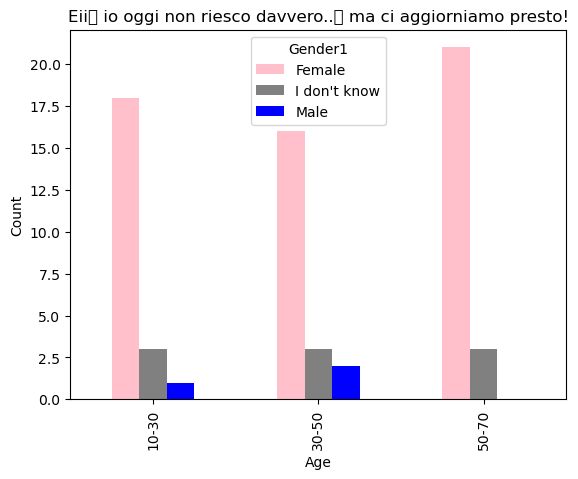

In [27]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender1']).size().unstack()

# Colori per le colonne
colori = ['pink', 'grey', 'blue']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Eii🩷 io oggi non riesco davvero..🥺 ma ci aggiorniamo presto!')

# Mostra il grafico
plt.show()

In [28]:
socio_gender.groupby(['Age', 'Gender1'])['Gender1_why']

In [29]:
socio_gender.groupby(['Age', 'Gender1'])['Gender1_why'].value_counts()

Age    Gender1       Gender1_why                                                                               
10-30  Female        Cuore rosa                                                                                    1
                     Di solito le donne sono più inclini a queste emoji e a riprogrammare subito                   1
                     Ho ricevuto messaggi simili                                                                   1
                     Presenza di eii, cuoricino e emoji che tenta di empatizzare                                   1
                     Sensibile                                                                                     1
                     Solitamente le persone di sesso femminile tendono  ad utilizzare più emoticon nei messaggi    1
                     È dolce                                                                                       1
30-50  Female        Per il cuore                                    

In [30]:
grouped_counts = socio_gender.groupby('Gender1')["Gender1_why"]
for gender_group, counts in grouped_counts:
    print(f"Gender: {gender_group}")
    conti = counts.tolist()
    for el in conti:
        if type(el) == str:
            el = el.strip()
        else:
            conti.remove(el)
    print(conti)

Gender: Female
['Solitamente le persone di sesso femminile tendono  ad utilizzare più emoticon nei messaggi', 'Presenza di eii, cuoricino e emoji che tenta di empatizzare', 'Cuore rosa', "Per l'uso del cuore rosa", 'Perchè gli uomini non perdono tempo a scrivere troppe cose ', 'Utilizza il cuoricino rosa', 'Mi pare adatto ', 'Cuore', 'Per il cuore', 'Perché c’è un cuore ', 'Empatia', 'L emoji del cuore', 'Per il cuore', 'Cuore rosa', 'Cuoricino rosa', 'Empatia', "L'uso del cuoricino è maggiore nelle ragazze ", 'Cuoricino rosa', 'La presenza del cuore ', 'Cuore rosa', 'Non ha voglia', 'È un rifiuto gentile ', 'Per i cuoricini ', 'Uso del cuore ', 'Cuoricino occhi umidi', 'Per il cuore rosa', nan, nan, 'Uso del cuore', nan, 'Ho ricevuto messaggi simili', 'Cuore rosa , dispiacere ..', 'Abb lungo ', 'Affettuoso', 'Uso di cuore più faccia', 'È dolce', nan, nan, nan, 'Sensibile', 'Di solito le donne sono più inclini a queste emoji e a riprogrammare subito']
Gender: I don't know
['Perché cred

In [31]:
gender_why_1 = socio_gender["Gender1_why"].tolist()
new_gender_why_1 = []

for el in gender_why_1:
    if type(el) == str:
        el = el.strip()
        new_gender_why_1.append(el)

new_gender_why_1

['Solitamente le persone di sesso femminile tendono  ad utilizzare più emoticon nei messaggi',
 'Presenza di eii, cuoricino e emoji che tenta di empatizzare',
 'Perché credo che possa essere scritto sia da una donna che da un uomo',
 'Cuore rosa',
 "Per l'uso del cuore rosa",
 'Perchè gli uomini non perdono tempo a scrivere troppe cose',
 'Utilizza il cuoricino rosa',
 'Mi pare adatto',
 'Cuore',
 'Per il cuore',
 'Perché c’è un cuore',
 'Empatia',
 'La scriverei per entrambi i generi.',
 'L emoji del cuore',
 'Non ci sono elementi che mi fanno comprendere il genere',
 'Breve, senza tanti preamboli',
 'Per il cuore',
 'Cuore rosa',
 'Cuoricino rosa',
 'Empatia',
 "L'uso del cuoricino è maggiore nelle ragazze",
 'Cuoricino rosa',
 'La presenza del cuore',
 'Cuore rosa',
 'Non ha voglia',
 'Non è determinabile',
 'È un rifiuto gentile',
 'Per i cuoricini',
 'Uso del cuore',
 'Cuoricino occhi umidi',
 'Per il cuore rosa',
 'Uso del cuore',
 'Ho ricevuto messaggi simili',
 'Cuore rosa , di

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


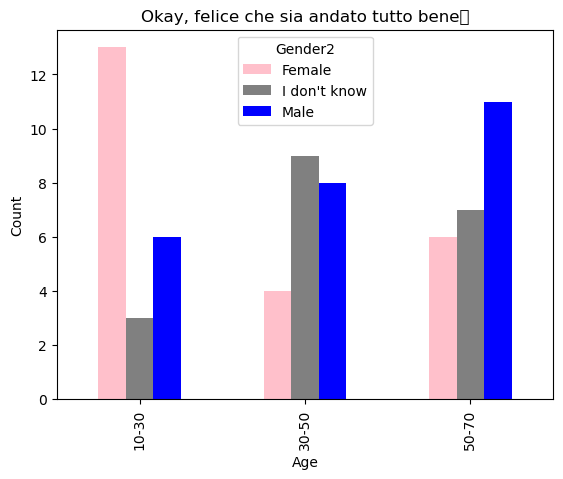

In [32]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender2']).size().unstack()

# Colori per le colonne
colori = ['pink', 'grey', 'blue']   # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay, felice che sia andato tutto bene✨')

# Mostra il grafico
plt.show()

In [33]:
socio_gender.groupby(['Age', 'Gender2'])['Gender2_why'].value_counts()


Age    Gender2       Gender2_why                                                                                            
10-30  Female        Ha usato l emoji della stellina                                                                            1
                     Lo scriverei per essere gentile                                                                            1
                     Potrei averlo scritto io                                                                                   1
                     Stelline..                                                                                                 1
                     ✨ emoji utilizzata più da ragazze che da ragazzi (secondo la mia esperienza)                               1
       I don't know  Viene usata una sola emoji, mi sembra abbastanza neutro                                                    1
       Male          Easy, veloce ma gentile                                                   

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


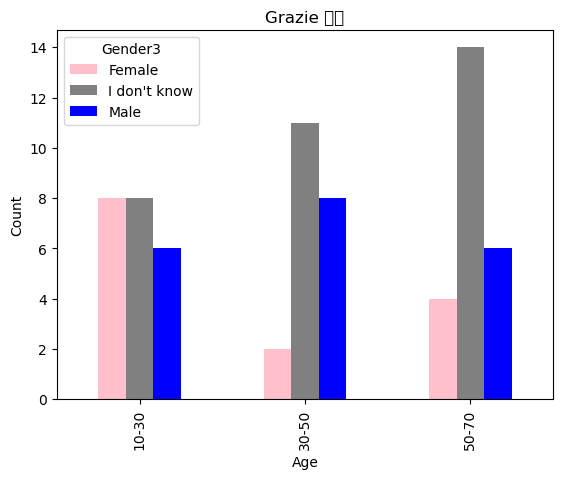

In [34]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender3']).size().unstack()

# Colori per le colonne
colori = ['pink', 'grey', 'blue']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Grazie 🙌🥺')

# Mostra il grafico
plt.show()

In [35]:
socio_gender.groupby(['Age', 'Gender3'])['Gender3_why'].value_counts()


Age    Gender3       Gender3_why                                                                                           
10-30  Female        La seconda emoticon viene utilizzata più dalle persone di sesso femminile per la mia esperienza           1
                     Sensibile                                                                                                 1
                     Tante emoji                                                                                               1
       I don't know  La prima faccina mi destabilizza                                                                          1
       Male          Le manine così tutti i miei amici maschi                                                                  1
30-50  I don't know  Entrambi i generi                                                                                         1
                     Neutro                                                                           

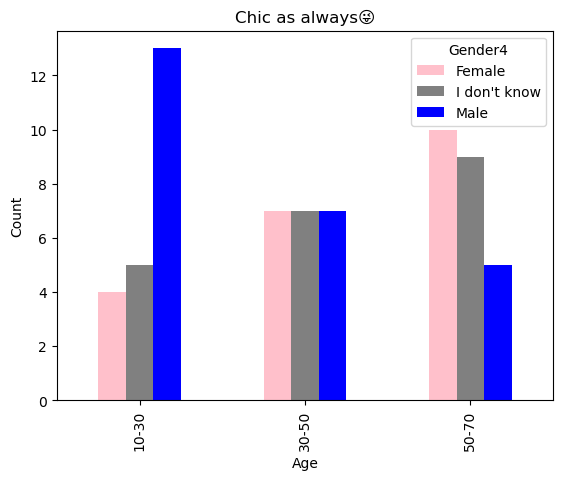

In [36]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender4']).size().unstack()

# Colori per le colonne
colori = ['pink',  'grey', 'blue']   # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Chic as always😜')

# Mostra il grafico
plt.show()

In [37]:
socio_gender.groupby('Age')['Gender4'].value_counts()

Age    Gender4     
10-30  Male            13
       I don't know     5
       Female           4
30-50  Female           7
       I don't know     7
       Male             7
50-70  Female          10
       I don't know     9
       Male             5
Name: Gender4, dtype: int64

In [38]:
socio_gender.groupby(['Age', 'Gender4'])['Gender4_why'].value_counts()


Age    Gender4       Gender4_why                                                                                                
10-30  I don't know  Non la vedo quasi mai                                                                                          1
                     Può essere un messaggio scritto da chiunque                                                                    1
       Male          Emoji da marpione                                                                                              1
                     La faccina                                                                                                     1
                     Scrive così solo il mio migliore amico                                                                         1
                     Sembra un tentativo di flirt con un emoji usata male                                                           1
30-50  Female        Chic lo uso più per una donna                 

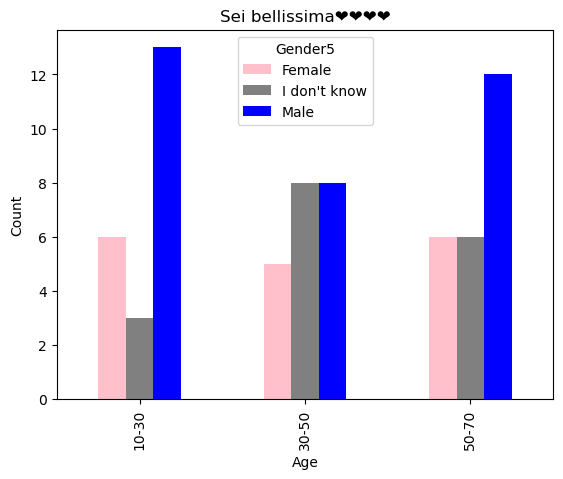

In [39]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender5']).size().unstack()

# Colori per le colonne
colori = ['pink',  'grey', 'blue']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Sei bellissima❤️❤️❤️❤️')

# Mostra il grafico
plt.show()

In [40]:
socio_gender.groupby(['Age', 'Gender5'])['Gender5_why'].value_counts()


Age    Gender5       Gender5_why                                                                                   
10-30  Female        L'utilizzo di tanti cuori lo associo di più al genere femminile                                   1
                     Tutti sti cuori                                                                                   1
                     È al femminile                                                                                    1
       I don't know  Perché potrebbero essere stati entrambi                                                           1
       Male          Complimento sincero                                                                               1
                     Rimorchio                                                                                         1
                     Sembra il messaggio scritto da un ragazzo alla fidanzata/ragazza                                  1
                     Tipico complimen

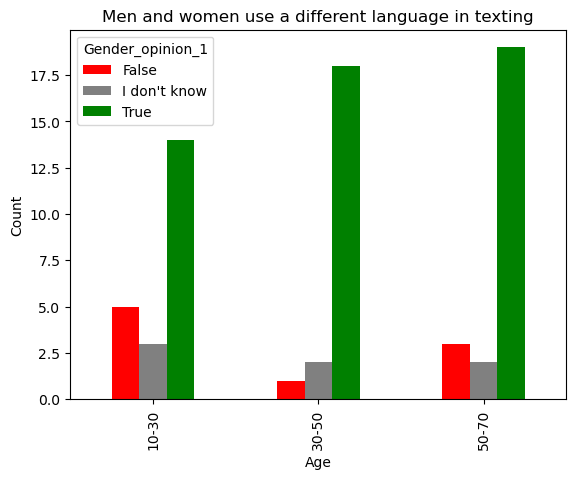

In [41]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_1']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Men and women use a different language in texting')

# Mostra il grafico
plt.show()

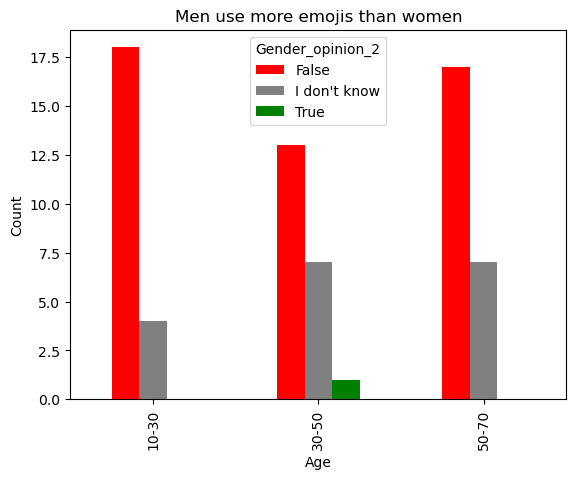

In [42]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_2']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Men use more emojis than women')

# Mostra il grafico
plt.show()

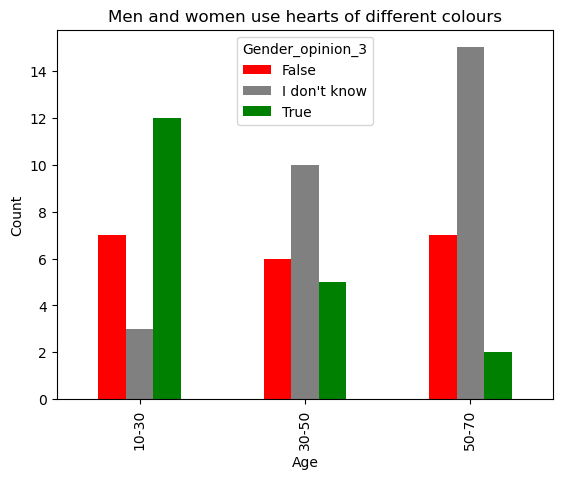

In [43]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_3']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Men and women use hearts of different colours')

# Mostra il grafico
plt.show()

In [44]:
socio_gender.groupby('Age')['Gender_opinion_3'].value_counts()

Age    Gender_opinion_3
10-30  True                12
       False                7
       I don't know         3
30-50  I don't know        10
       False                6
       True                 5
50-70  I don't know        15
       False                7
       True                 2
Name: Gender_opinion_3, dtype: int64

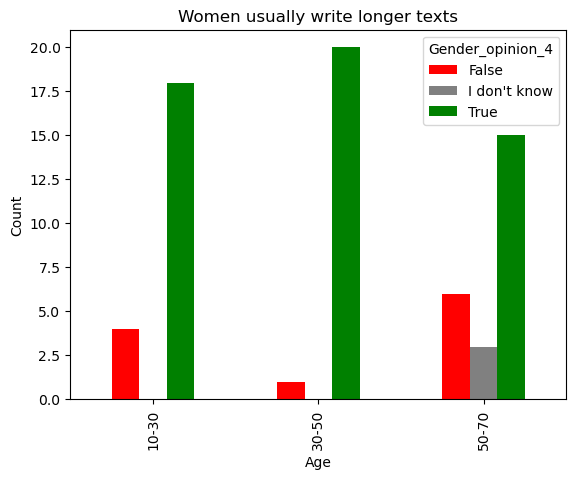

In [45]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_4']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Women usually write longer texts')

# Mostra il grafico
plt.show()

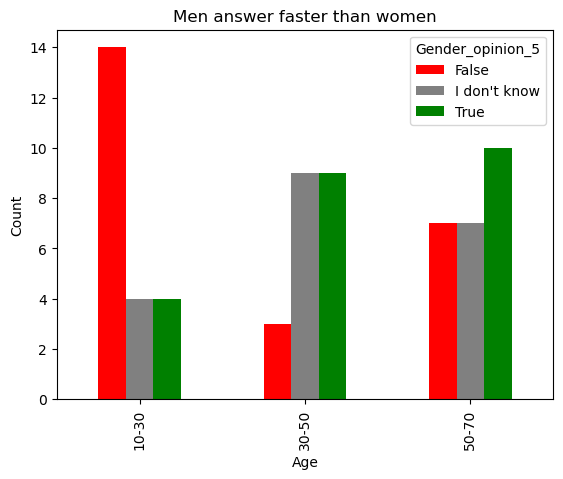

In [46]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_5']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Men answer faster than women')

# Mostra il grafico
plt.show()

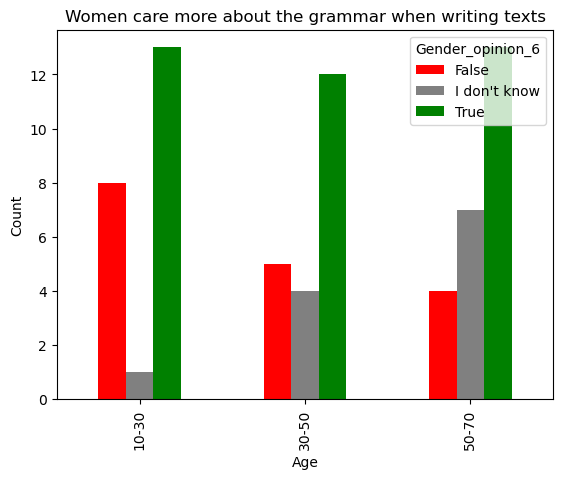

In [47]:
conteggi_per_eta = socio_gender.groupby(['Age', 'Gender_opinion_6']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Women care more about the grammar when writing texts')

# Mostra il grafico
plt.show()

### Age

In [48]:
socio_age = socio[["Age", "Age_detection_1", "Age_detection_2", "Age_detection_3", "Age_detection_4", "Age_detection_5", "Age_detection_6", "Age_detection_why", "Age_opinion_1", "Age_opinion_2", "Age_opinion_3", "Age_opinion_4", "Age_opinion_5"]]
socio_age

,Age,Age_detection_1,Age_detection_2,Age_detection_3,Age_detection_4,Age_detection_5,Age_detection_6,Age_detection_why,Age_opinion_1,Age_opinion_2,Age_opinion_3,Age_opinion_4,Age_opinion_5
3,10-30,24,70,24,24,70,40,Solitamente le persone anziane tendono a scriv...,Vero,Non so,Non so,Non so,Vero
5,10-30,31,50,23,29,25,30,"Emoji vecchia, pollice in su solo over 40, num...",Falso,Falso,Falso,Falso,Vero
9,50-70,32,54,54,29,53,36,Non saprei dare una definizione esatta!!! Mi s...,Non so,Non so,Non so,Non so,Non so
10,10-30,18,34,30,21,25,35,Penso che le persone più mature (30+) siano pi...,Falso,Non so,Non so,Vero,Vero
11,10-30,10,54,23,42,70,50,Messaggi più seri e con più faccine da vecchi ...,Falso,Falso,Vero,Non so,Vero
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,30,50,20,20,40,50,sono capitate,Falso,Falso,Non so,Vero,Vero
91,10-30,15,50,25,20,50,20,A seconda del tipo di frase,Vero,Falso,Non so,Vero,Falso
92,10-30,15,40,15,22,25,41,Le attribuisco a persone che conosco,Vero,Falso,Vero,Falso,Falso
93,10-30,40,22,18,25,30,45,Direi che un giovane adesso scrive in tanti mo...,Vero,Falso,Falso,Non so,Falso


In [49]:
mapping_opinion = {"Vero": "True", "Falso": "False", "Non so": "I don't know"}
socio_age['Age_opinion_1'] = socio_age['Age_opinion_1'].replace(mapping_opinion)
socio_age['Age_opinion_2'] = socio_age['Age_opinion_2'].replace(mapping_opinion)
socio_age['Age_opinion_3'] = socio_age['Age_opinion_3'].replace(mapping_opinion)
socio_age['Age_opinion_4'] = socio_age['Age_opinion_4'].replace(mapping_opinion)
socio_age['Age_opinion_5'] = socio_age['Age_opinion_5'].replace(mapping_opinion)

C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2756959741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_age['Age_opinion_1'] = socio_age['Age_opinion_1'].replace(mapping_opinion)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2756959741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_age['Age_opinion_2'] = socio_age['Age_opinion_2'].replace(mapping_opinion)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2756959741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [50]:
socio_age

,Age,Age_detection_1,Age_detection_2,Age_detection_3,Age_detection_4,Age_detection_5,Age_detection_6,Age_detection_why,Age_opinion_1,Age_opinion_2,Age_opinion_3,Age_opinion_4,Age_opinion_5
3,10-30,24,70,24,24,70,40,Solitamente le persone anziane tendono a scriv...,True,I don't know,I don't know,I don't know,True
5,10-30,31,50,23,29,25,30,"Emoji vecchia, pollice in su solo over 40, num...",False,False,False,False,True
9,50-70,32,54,54,29,53,36,Non saprei dare una definizione esatta!!! Mi s...,I don't know,I don't know,I don't know,I don't know,I don't know
10,10-30,18,34,30,21,25,35,Penso che le persone più mature (30+) siano pi...,False,I don't know,I don't know,True,True
11,10-30,10,54,23,42,70,50,Messaggi più seri e con più faccine da vecchi ...,False,False,True,I don't know,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,30,50,20,20,40,50,sono capitate,False,False,I don't know,True,True
91,10-30,15,50,25,20,50,20,A seconda del tipo di frase,True,False,I don't know,True,False
92,10-30,15,40,15,22,25,41,Le attribuisco a persone che conosco,True,False,True,False,False
93,10-30,40,22,18,25,30,45,Direi che un giovane adesso scrive in tanti mo...,True,False,False,I don't know,False


In [51]:
age_det_1 = socio_age.groupby('Age')['Age_detection_1'].apply(list).reset_index(name='age_det_1')
age_det_2 = socio_age.groupby('Age')['Age_detection_2'].apply(list).reset_index(name='age_det_2')
age_det_3 = socio_age.groupby('Age')['Age_detection_3'].apply(list).reset_index(name='age_det_3')
age_det_4 = socio_age.groupby('Age')['Age_detection_4'].apply(list).reset_index(name='age_det_4')
age_det_5 = socio_age.groupby('Age')['Age_detection_5'].apply(list).reset_index(name='age_det_5')
age_det_6 = socio_age.groupby('Age')['Age_detection_6'].apply(list).reset_index(name='age_det_6')
# Display the resulting DataFrame
print(age_det_1)

     Age                                          age_det_1
0  10-30  [24, 31, 18, 10, 24, 20, 27, 22, 25, 20, 18, 4...
1  30-50  [20, 42, 26, 40, 15, 26, 32, 70, 26, 37, 17, 3...
2  50-70  [32, 35, 39, 51, 27, 41, 25, 46, 30, 26, 41, 4...


In [52]:
import numpy as np

In [53]:
print("Messaggio: Perfetto!!❤️‍🔥")

for index, row in age_det_1.iterrows():
    age = row['Age']
    age_answer = row['age_det_1']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: Perfetto!!❤️‍🔥
Age group: 10-30, Mean answer: 22.818181818181817, Median answer:21.5
Age group: 30-50, Mean answer: 31.714285714285715, Median answer:30.0
Age group: 50-70, Mean answer: 35.708333333333336, Median answer:39.0


In [54]:
print(age_det_2)

     Age                                          age_det_2
0  10-30  [70, 50, 34, 54, 24, 40, 49, 30, 40, 35, 54, 4...
1  30-50  [52, 39, 60, 26, 50, 36, 37, 31, 42, 48, 37, 5...
2  50-70  [54, 40, 42, 50, 45, 41, 59, 50, 43, 55, 44, 3...


In [55]:
print("Messaggio: Allora ci sentiamo domani👍")

for index, row in age_det_2.iterrows():
    age = row['Age']
    age_answer = row['age_det_2']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: Allora ci sentiamo domani👍
Age group: 10-30, Mean answer: 43.40909090909091, Median answer:47.0
Age group: 30-50, Mean answer: 41.23809523809524, Median answer:39.0
Age group: 50-70, Mean answer: 47.333333333333336, Median answer:47.5


In [56]:
print(age_det_3)

     Age                                          age_det_3
0  10-30  [24, 23, 30, 23, 23, 26, 20, 30, 16, 26, 20, 2...
1  30-50  [40, 34, 43, 28, 20, 23, 40, 42, 39, 30, 39, 2...
2  50-70  [54, 56, 26, 44, 53, 55, 40, 18, 27, 49, 45, 4...


In [57]:
print("Messaggio: Non ne posso più😭😭😭😭")

for index, row in age_det_3.iterrows():
    age = row['Age']
    age_answer = row['age_det_3']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: Non ne posso più😭😭😭😭
Age group: 10-30, Mean answer: 21.863636363636363, Median answer:22.0
Age group: 30-50, Mean answer: 33.666666666666664, Median answer:37.0
Age group: 50-70, Mean answer: 41.458333333333336, Median answer:44.5


In [58]:
print("Messaggio: NON VEDO L'ORAAAA")

for index, row in age_det_4.iterrows():
    age = row['Age']
    age_answer = row['age_det_4']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: NON VEDO L'ORAAAA
Age group: 10-30, Mean answer: 23.863636363636363, Median answer:22.0
Age group: 30-50, Mean answer: 31.80952380952381, Median answer:26.0
Age group: 50-70, Mean answer: 31.041666666666668, Median answer:26.0


In [59]:
print("Messaggio: Grazie dell'aiuto")

for index, row in age_det_5.iterrows():
    age = row['Age']
    age_answer = row['age_det_5']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: Grazie dell'aiuto
Age group: 10-30, Mean answer: 42.68181818181818, Median answer:42.5
Age group: 30-50, Mean answer: 44.76190476190476, Median answer:45.0
Age group: 50-70, Mean answer: 48.708333333333336, Median answer:53.5


In [60]:
pd.set_option('display.max_colwidth', None)
print(age_det_6)

     Age  \
0  10-30   
1  30-50   
2  50-70   

                                                                                          age_det_6  
0          [40, 30, 35, 50, 26, 56, 35, 18, 23, 20, 15, 50, 40, 50, 60, 18, 13, 50, 20, 41, 45, 18]  
1              [14, 29, 28, 40, 20, 35, 40, 51, 28, 23, 28, 30, 24, 17, 14, 35, 46, 16, 16, 20, 41]  
2  [36, 51, 59, 54, 33, 30, 21, 16, 23, 40, 37, 22, 15, 57, 59, 54, 25, 33, 42, 33, 52, 40, 50, 66]  


In [61]:
print("Messaggio: Sei fantastica😘😘😘😘😘😘😘😘😘")

for index, row in age_det_6.iterrows():
    age = row['Age']
    age_answer = row['age_det_6']
    age_answer_num = list(map(int, age_answer))
    #print(len(age_answer_num))
    #print(type(age_answer_num[0]))
    age_mean = sum(age_answer_num) / len(age_answer_num)
    mediana = np.median(age_answer_num)
    #print(Age group answer: {age_answer_num},)
    print(f"Age group: {age}, Mean answer: {age_mean}, Median answer:{mediana}")

Messaggio: Sei fantastica😘😘😘😘😘😘😘😘😘
Age group: 10-30, Mean answer: 34.22727272727273, Median answer:35.0
Age group: 30-50, Mean answer: 28.333333333333332, Median answer:28.0
Age group: 50-70, Mean answer: 39.5, Median answer:38.5


In [62]:
print(socio_age.groupby('Age')['Age_detection_why'].value_counts().to_string())

Age    Age_detection_why                                                                                                                                                                                                                                          
10-30  .                                                                                                                                                                                                                                                              1
       A seconda del tipo di frase                                                                                                                                                                                                                                    1
       Direi che un giovane adesso scrive in tanti modi diversi, invece persone più anziane o comunque oltre ai 30/35 anni tendono ad usare le stesse emoji in continuo.                                             

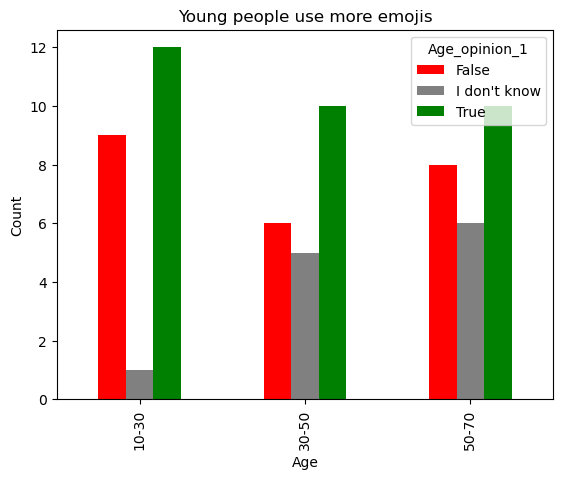

In [63]:
conteggi_per_eta = socio_age.groupby(['Age', 'Age_opinion_1']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Young people use more emojis')

# Mostra il grafico
plt.show()

In [64]:
socio_age["Age_opinion_1"].value_counts()

True            32
False           23
I don't know    12
Name: Age_opinion_1, dtype: int64

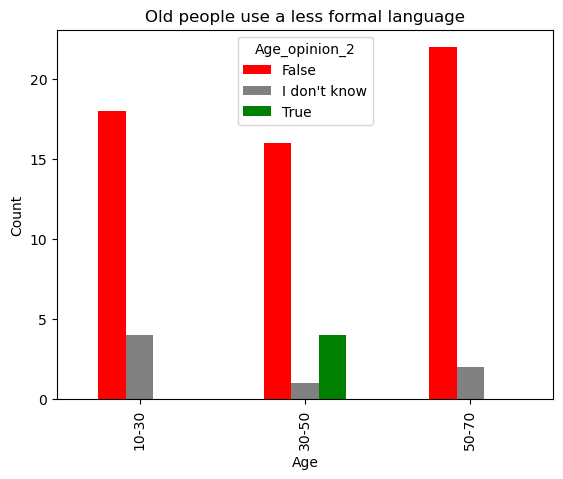

In [65]:
conteggi_per_eta = socio_age.groupby(['Age', 'Age_opinion_2']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Old people use a less formal language')

# Mostra il grafico
plt.show()

In [66]:
socio_age["Age_opinion_2"].value_counts()

False           56
I don't know     7
True             4
Name: Age_opinion_2, dtype: int64

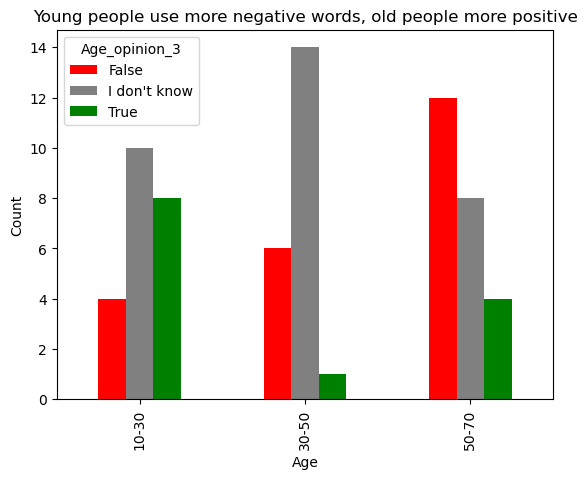

In [67]:
conteggi_per_eta = socio_age.groupby(['Age', 'Age_opinion_3']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Young people use more negative words, old people more positive')

# Mostra il grafico
plt.show()

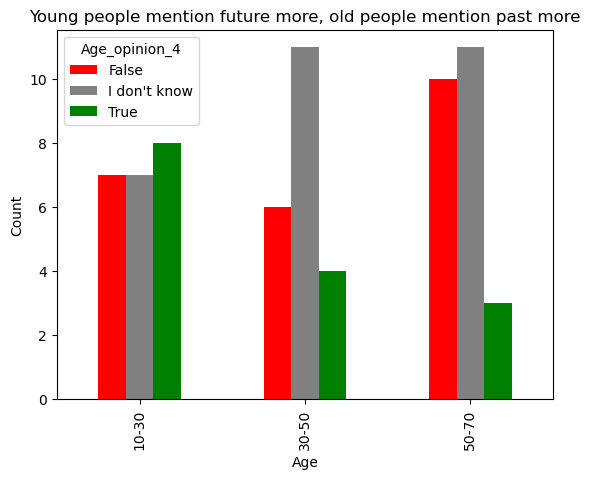

In [68]:
conteggi_per_eta = socio_age.groupby(['Age', 'Age_opinion_4']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Young people mention future more, old people mention past more')

# Mostra il grafico
plt.show()

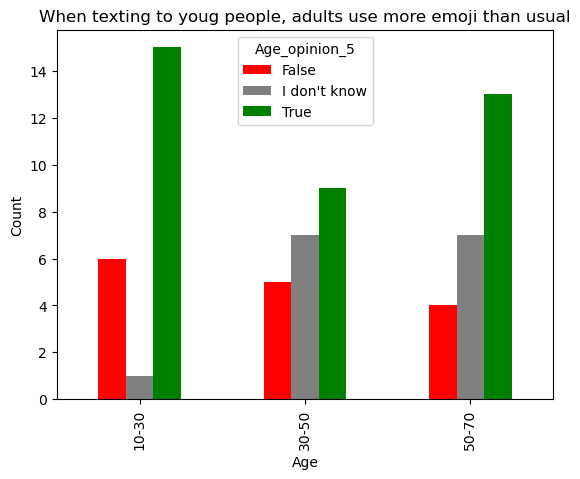

In [69]:
conteggi_per_eta = socio_age.groupby(['Age', 'Age_opinion_5']).size().unstack()

# Colori per le colonne
colori = ['Red', 'grey', 'green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('When texting to youg people, adults use more emoji than usual')

# Mostra il grafico
plt.show()

### Emoji Meaning

In [70]:
socio_emoji = socio[["Age", "Emotion_rank_1", "Emotion_rank_2", "Emotion_rank_3", "Emotion_rank_4", "Emotion_rank_5", "Emotion_rank_6", "Emotion_rank_7", "Emoji_func1", "Emoji_func2", "Emoji_func3", "Emoji_func_final", "Opinion1", "Opinion2", "Opinion3", "Opinion4", "Laugh", "Reverse", "Smiley", "Melted"]]
socio_emoji

,Age,Emotion_rank_1,Emotion_rank_2,Emotion_rank_3,Emotion_rank_4,Emotion_rank_5,Emotion_rank_6,Emotion_rank_7,Emoji_func1,Emoji_func2,Emoji_func3,Emoji_func_final,Opinion1,Opinion2,Opinion3,Opinion4,Laugh,Reverse,Smiley,Melted
3,10-30,Neutrale,Dolce/Felice,Arrabbiato,Ironico,Neutrale,Arrabbiato,Dolce/Felice,Enfatizzare il significato letterale del messaggio,Addolcire/smorzare il messaggio,Enfatizzare il significato letterale del messaggio,No,Uguale,Mi dà fastidio,No,"No, preferisco parlare di alcune cose di persona",Ridere,Personalmente la utilizzo per dire che non sono d’accordo con qualcosa o quando sono sorpresa,Felice,Mi sciolgo ma in senso anche di “sono stanco”
5,10-30,Neutrale,Dolce/Felice,Arrabbiato,Dolce/Felice,Dolce/Felice,Ironico,Dolce/Felice,Enfatizzare il significato letterale del messaggio,Addolcire/smorzare il messaggio,Rendere il messaggio più giocoso,No,Uguale,Mi dà fastidio,No,"No, preferisco parlare di alcune cose di persona",Mi fa ridere,Sono interdetta da quello che c'è scritto,Rido per non piangere,Fa caldo o rido per non piangere malissimo
9,50-70,Neutrale,Dolce/Felice,Neutrale,Ironico,Ironico,Neutrale,Dolce/Felice,Addolcire/smorzare il messaggio,Enfatizzare il significato letterale del messaggio,Enfatizzare il significato letterale del messaggio,No,Uguale,"Non è un problema, purchè riesca a capire il messaggio",Non so,"No, preferisco parlare di alcune cose di persona",Risata,Imbarazzanti,D’accordo,Mi sto sciogliendo
10,10-30,Arrabbiato,Dolce/Felice,Arrabbiato,Ironico,Dolce/Felice,Ironico,Dolce/Felice,Fare ironia,Addolcire/smorzare il messaggio,Fare ironia,No,Più informale,"Non è un problema, purchè riesca a capire il messaggio",Si,"No, preferisco parlare di alcune cose di persona",Ironico,La utilizzo quando sono perplessa rispetto al messaggio ricevuto dalla persona a cui sto scrivendo,Lo utilizzo per essere formale/quando sono arrabbiata,Non lo so
11,10-30,Neutrale,Dolce/Felice,Arrabbiato,Ironico,Dolce/Felice,Arrabbiato,Triste,Rendere il messaggio più giocoso,Addolcire/smorzare il messaggio,Enfatizzare il significato letterale del messaggio,No,Più informale,Mi dà fastidio,Si,"No, preferisco parlare di alcune cose di persona",Risata,Giocoso/annoiato,Normale,Moiooo/ vorrei sotterrarmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,Neutrale,Dolce/Felice,Arrabbiato,Ironico,Dolce/Felice,Triste,Dolce/Felice,Rendere il messaggio più giocoso,Addolcire/smorzare il messaggio,Rendere il messaggio più giocoso,No,Uguale,Non ci faccio caso,No,"No, preferisco parlare di alcune cose di persona",divertente,scherzoso,neutro,dolce
91,10-30,Neutrale,Dolce/Felice,Arrabbiato,Dolce/Felice,Neutrale,Arrabbiato,Neutrale,Enfatizzare il significato letterale del messaggio,Addolcire/smorzare il messaggio,Enfatizzare il significato letterale del messaggio,No,Uguale,"Non è un problema, purchè riesca a capire il messaggio",No,"No, preferisco parlare di alcune cose di persona",Ridere tanto,Imbarazzato,Felice,Annoiato
92,10-30,Neutrale,Dolce/Felice,Triste,Ironico,Neutrale,Arrabbiato,Dolce/Felice,Addolcire/smorzare il messaggio,Addolcire/smorzare il messaggio,Fare ironia,No,Più informale,"Non è un problema, purchè riesca a capire il messaggio",No,"No, preferisco parlare di alcune cose di persona",Risata,Ironia,Ironia,Lo uso per dire che qualcuno è particolarmente bello
93,10-30,Neutrale,Dolce/Felice,Neutrale,Ironico,Dolce/Felice,Arrabbiato,Neutrale,Fare ironia,Addolcire/smorzare il messaggio,Rendere il messaggio più giocoso,No,Uguale,"Non è un problema, purchè riesca a capire il messaggio",Si,"No, preferisco parlare di alcune cose di persona",Ridere,Un sorriso irritato ma al contrario quindi più buffo,Un sorriso un po’ irritato,Avere caldo o essere stanchissimi


In [71]:
mapping_emotion = {"Neutrale": "Neutral", "Dolce/Felice": "Sweet/Happy", "Arrabbiato": "Angry", "Ironico": "Ironic", "Triste": "Sad"}
mapping_func = {"Enfatizzare il significato letterale del messaggio": "Emphasize the literal meaning of the message", "Addolcire/smorzare il messaggio": "Sweeten/dampen the message", "Rendere il messaggio più giocoso": "Making the message more playful", "Fare ironia": "Being ironic"}
mapping_emoji_op = {"Più formale": "More formal", "Più informale": "Less formal", "Uguale": "The same", "Mi dà fastidio": "It bothers me", "Non è un problema, purchè riesca a capire il messaggio": "It's not a problem as long as I can understand the message", "Non ci faccio caso": "I don't mind", "Si, uso sempre i messaggi per comunicare": "Yes, I always use messages to communicate", "No, preferisco parlare di alcune cose di persona": "No, I prefer to talk about some things in person", "Non ci faccio caso": "I don't know"}
socio_emoji['Emotion_rank_1'] = socio_emoji['Emotion_rank_1'].replace(mapping_emotion)
socio_emoji['Emotion_rank_2'] = socio_emoji['Emotion_rank_2'].replace(mapping_emotion)
socio_emoji['Emotion_rank_3'] = socio_emoji['Emotion_rank_3'].replace(mapping_emotion)
socio_emoji['Emotion_rank_4'] = socio_emoji['Emotion_rank_4'].replace(mapping_emotion)
socio_emoji['Emotion_rank_5'] = socio_emoji['Emotion_rank_5'].replace(mapping_emotion)
socio_emoji['Emotion_rank_6'] = socio_emoji['Emotion_rank_6'].replace(mapping_emotion)
socio_emoji['Emotion_rank_7'] = socio_emoji['Emotion_rank_7'].replace(mapping_emotion)
socio_emoji['Emoji_func1'] = socio_emoji['Emoji_func1'].replace(mapping_func)
socio_emoji['Emoji_func2'] = socio_emoji['Emoji_func2'].replace(mapping_func)
socio_emoji['Emoji_func3'] = socio_emoji['Emoji_func3'].replace(mapping_func)
socio_emoji['Emoji_func_final'] = socio_emoji['Emoji_func_final'].replace(mapping3)
socio_emoji['Opinion1'] = socio_emoji['Opinion1'].replace(mapping_emoji_op)
socio_emoji['Opinion2'] = socio_emoji['Opinion2'].replace(mapping_emoji_op)
socio_emoji['Opinion3'] = socio_emoji['Opinion3'].replace(mapping3)
socio_emoji['Opinion4'] = socio_emoji['Opinion4'].replace(mapping_emoji_op)

C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2952106443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_emoji['Emotion_rank_1'] = socio_emoji['Emotion_rank_1'].replace(mapping_emotion)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2952106443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_emoji['Emotion_rank_2'] = socio_emoji['Emotion_rank_2'].replace(mapping_emotion)
C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2952106443.py:6: SettingWithCopyWarning: 
A value is trying to be

In [72]:
socio_emoji

,Age,Emotion_rank_1,Emotion_rank_2,Emotion_rank_3,Emotion_rank_4,Emotion_rank_5,Emotion_rank_6,Emotion_rank_7,Emoji_func1,Emoji_func2,Emoji_func3,Emoji_func_final,Opinion1,Opinion2,Opinion3,Opinion4,Laugh,Reverse,Smiley,Melted
3,10-30,Neutral,Sweet/Happy,Angry,Ironic,Neutral,Angry,Sweet/Happy,Emphasize the literal meaning of the message,Sweeten/dampen the message,Emphasize the literal meaning of the message,No,The same,It bothers me,No,"No, I prefer to talk about some things in person",Ridere,Personalmente la utilizzo per dire che non sono d’accordo con qualcosa o quando sono sorpresa,Felice,Mi sciolgo ma in senso anche di “sono stanco”
5,10-30,Neutral,Sweet/Happy,Angry,Sweet/Happy,Sweet/Happy,Ironic,Sweet/Happy,Emphasize the literal meaning of the message,Sweeten/dampen the message,Making the message more playful,No,The same,It bothers me,No,"No, I prefer to talk about some things in person",Mi fa ridere,Sono interdetta da quello che c'è scritto,Rido per non piangere,Fa caldo o rido per non piangere malissimo
9,50-70,Neutral,Sweet/Happy,Neutral,Ironic,Ironic,Neutral,Sweet/Happy,Sweeten/dampen the message,Emphasize the literal meaning of the message,Emphasize the literal meaning of the message,No,The same,It's not a problem as long as I can understand the message,I don't know,"No, I prefer to talk about some things in person",Risata,Imbarazzanti,D’accordo,Mi sto sciogliendo
10,10-30,Angry,Sweet/Happy,Angry,Ironic,Sweet/Happy,Ironic,Sweet/Happy,Being ironic,Sweeten/dampen the message,Being ironic,No,Less formal,It's not a problem as long as I can understand the message,Yes,"No, I prefer to talk about some things in person",Ironico,La utilizzo quando sono perplessa rispetto al messaggio ricevuto dalla persona a cui sto scrivendo,Lo utilizzo per essere formale/quando sono arrabbiata,Non lo so
11,10-30,Neutral,Sweet/Happy,Angry,Ironic,Sweet/Happy,Angry,Sad,Making the message more playful,Sweeten/dampen the message,Emphasize the literal meaning of the message,No,Less formal,It bothers me,Yes,"No, I prefer to talk about some things in person",Risata,Giocoso/annoiato,Normale,Moiooo/ vorrei sotterrarmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,10-30,Neutral,Sweet/Happy,Angry,Ironic,Sweet/Happy,Sad,Sweet/Happy,Making the message more playful,Sweeten/dampen the message,Making the message more playful,No,The same,I don't know,No,"No, I prefer to talk about some things in person",divertente,scherzoso,neutro,dolce
91,10-30,Neutral,Sweet/Happy,Angry,Sweet/Happy,Neutral,Angry,Neutral,Emphasize the literal meaning of the message,Sweeten/dampen the message,Emphasize the literal meaning of the message,No,The same,It's not a problem as long as I can understand the message,No,"No, I prefer to talk about some things in person",Ridere tanto,Imbarazzato,Felice,Annoiato
92,10-30,Neutral,Sweet/Happy,Sad,Ironic,Neutral,Angry,Sweet/Happy,Sweeten/dampen the message,Sweeten/dampen the message,Being ironic,No,Less formal,It's not a problem as long as I can understand the message,No,"No, I prefer to talk about some things in person",Risata,Ironia,Ironia,Lo uso per dire che qualcuno è particolarmente bello
93,10-30,Neutral,Sweet/Happy,Neutral,Ironic,Sweet/Happy,Angry,Neutral,Being ironic,Sweeten/dampen the message,Making the message more playful,No,The same,It's not a problem as long as I can understand the message,Yes,"No, I prefer to talk about some things in person",Ridere,Un sorriso irritato ma al contrario quindi più buffo,Un sorriso un po’ irritato,Avere caldo o essere stanchissimi


In [73]:
socio_emoji["Opinion2"].unique()
socio_emoji["Opinion2"] = socio_emoji["Opinion2"].replace("I don't know","I don't mind")
socio_emoji["Opinion2"].unique()

C:\Users\lucre\AppData\Local\Temp\ipykernel_6920\2311251446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_emoji["Opinion2"] = socio_emoji["Opinion2"].replace("I don't know","I don't mind")


array(['It bothers me',
       "It's not a problem as long as I can understand the message",
       "I don't mind"], dtype=object)

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


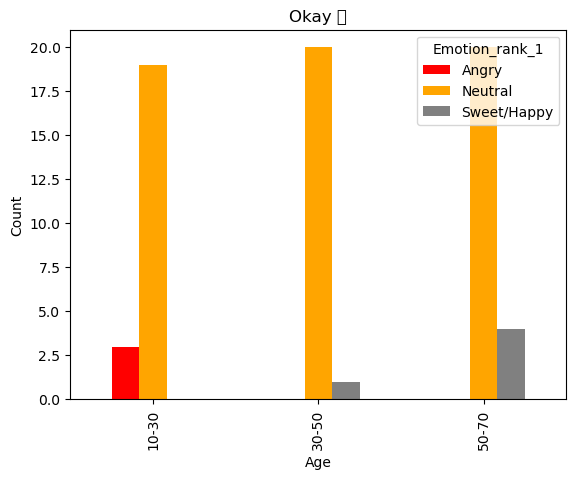

In [74]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_1']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay 👍')

# Mostra il grafico
plt.show()

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128152 (\N{HEART WITH ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


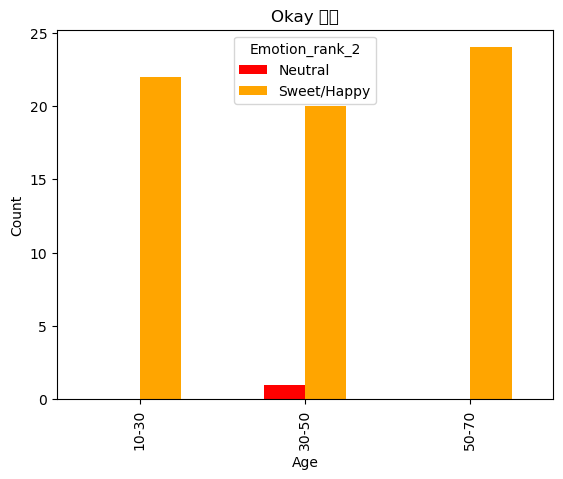

In [77]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_2']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay 💕💘')

# Mostra il grafico
plt.show()

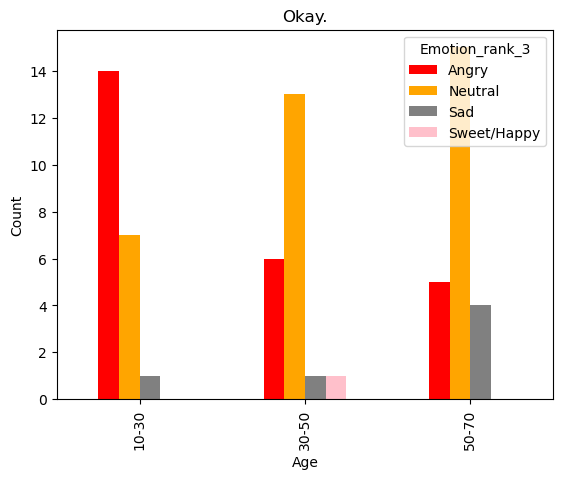

In [78]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_3']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay.')

# Mostra il grafico
plt.show()

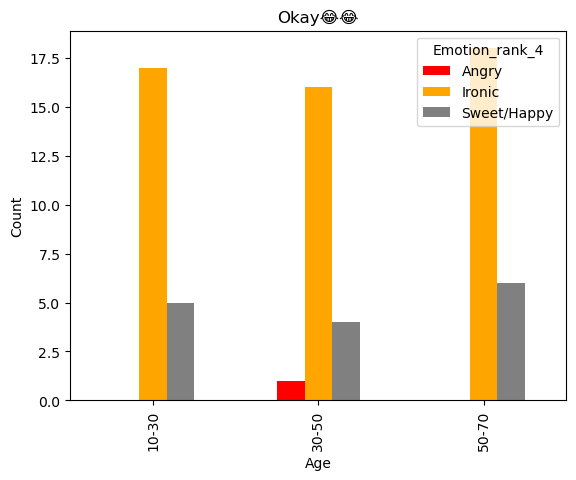

In [79]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_4']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay😂😂')

# Mostra il grafico
plt.show()

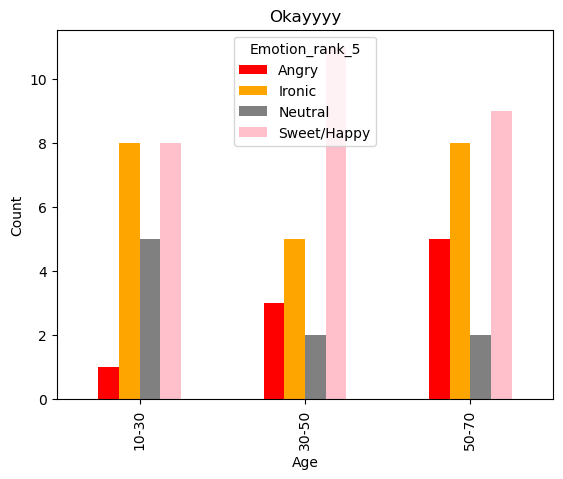

In [80]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_5']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okayyyy')

# Mostra il grafico
plt.show()

In [81]:
socio_emoji.groupby('Age')['Emotion_rank_5'].value_counts()

Age    Emotion_rank_5
10-30  Ironic             8
       Sweet/Happy        8
       Neutral            5
       Angry              1
30-50  Sweet/Happy       11
       Ironic             5
       Angry              3
       Neutral            2
50-70  Sweet/Happy        9
       Ironic             8
       Angry              5
       Neutral            2
Name: Emotion_rank_5, dtype: int64

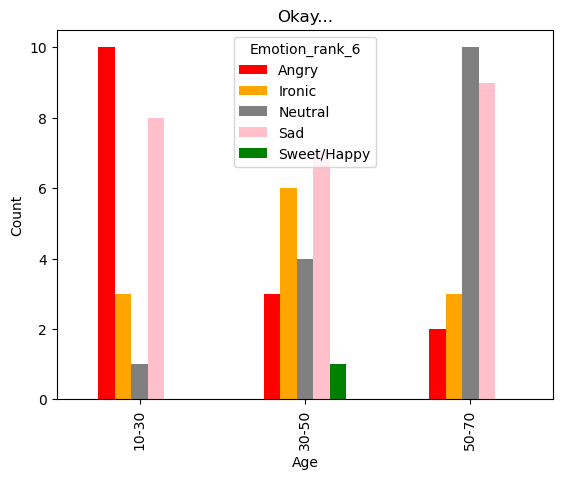

In [82]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_6']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay...')

# Mostra il grafico
plt.show()

In [83]:
socio_emoji.groupby('Age')['Emotion_rank_6'].value_counts()

Age    Emotion_rank_6
10-30  Angry             10
       Sad                8
       Ironic             3
       Neutral            1
30-50  Sad                7
       Ironic             6
       Neutral            4
       Angry              3
       Sweet/Happy        1
50-70  Neutral           10
       Sad                9
       Ironic             3
       Angry              2
Name: Emotion_rank_6, dtype: int64

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


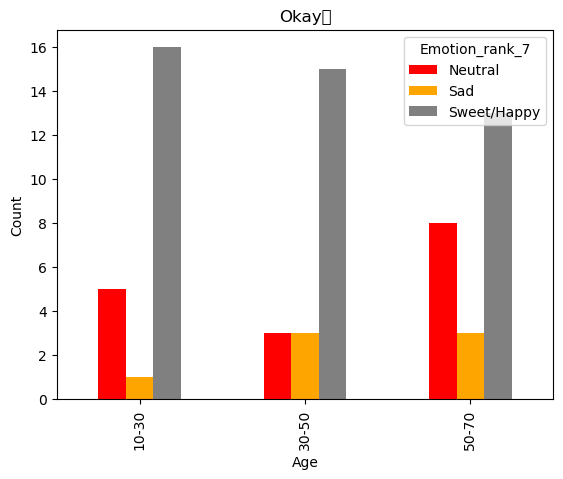

In [84]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emotion_rank_7']).size().unstack()

# Colori per le colonne
colori = ['Red', 'orange', 'grey', 'pink','green']  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Okay💙')

# Mostra il grafico
plt.show()

In [85]:
socio_emoji.head()

,Age,Emotion_rank_1,Emotion_rank_2,Emotion_rank_3,Emotion_rank_4,Emotion_rank_5,Emotion_rank_6,Emotion_rank_7,Emoji_func1,Emoji_func2,Emoji_func3,Emoji_func_final,Opinion1,Opinion2,Opinion3,Opinion4,Laugh,Reverse,Smiley,Melted
3,10-30,Neutral,Sweet/Happy,Angry,Ironic,Neutral,Angry,Sweet/Happy,Emphasize the literal meaning of the message,Sweeten/dampen the message,Emphasize the literal meaning of the message,No,The same,It bothers me,No,"No, I prefer to talk about some things in person",Ridere,Personalmente la utilizzo per dire che non sono d’accordo con qualcosa o quando sono sorpresa,Felice,Mi sciolgo ma in senso anche di “sono stanco”
5,10-30,Neutral,Sweet/Happy,Angry,Sweet/Happy,Sweet/Happy,Ironic,Sweet/Happy,Emphasize the literal meaning of the message,Sweeten/dampen the message,Making the message more playful,No,The same,It bothers me,No,"No, I prefer to talk about some things in person",Mi fa ridere,Sono interdetta da quello che c'è scritto,Rido per non piangere,Fa caldo o rido per non piangere malissimo
9,50-70,Neutral,Sweet/Happy,Neutral,Ironic,Ironic,Neutral,Sweet/Happy,Sweeten/dampen the message,Emphasize the literal meaning of the message,Emphasize the literal meaning of the message,No,The same,It's not a problem as long as I can understand the message,I don't know,"No, I prefer to talk about some things in person",Risata,Imbarazzanti,D’accordo,Mi sto sciogliendo
10,10-30,Angry,Sweet/Happy,Angry,Ironic,Sweet/Happy,Ironic,Sweet/Happy,Being ironic,Sweeten/dampen the message,Being ironic,No,Less formal,It's not a problem as long as I can understand the message,Yes,"No, I prefer to talk about some things in person",Ironico,La utilizzo quando sono perplessa rispetto al messaggio ricevuto dalla persona a cui sto scrivendo,Lo utilizzo per essere formale/quando sono arrabbiata,Non lo so
11,10-30,Neutral,Sweet/Happy,Angry,Ironic,Sweet/Happy,Angry,Sad,Making the message more playful,Sweeten/dampen the message,Emphasize the literal meaning of the message,No,Less formal,It bothers me,Yes,"No, I prefer to talk about some things in person",Risata,Giocoso/annoiato,Normale,Moiooo/ vorrei sotterrarmi


In [86]:
socio_emoji.groupby(['Age'])['Emoji_func1'].value_counts()

Age    Emoji_func1                                 
10-30  Emphasize the literal meaning of the message    14
       Making the message more playful                  3
       Sweeten/dampen the message                       3
       Being ironic                                     2
30-50  Emphasize the literal meaning of the message     8
       Making the message more playful                  7
       Being ironic                                     3
       Sweeten/dampen the message                       3
50-70  Emphasize the literal meaning of the message    13
       Making the message more playful                  5
       Sweeten/dampen the message                       4
       Being ironic                                     2
Name: Emoji_func1, dtype: int64

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129319 (\N{SNEEZING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


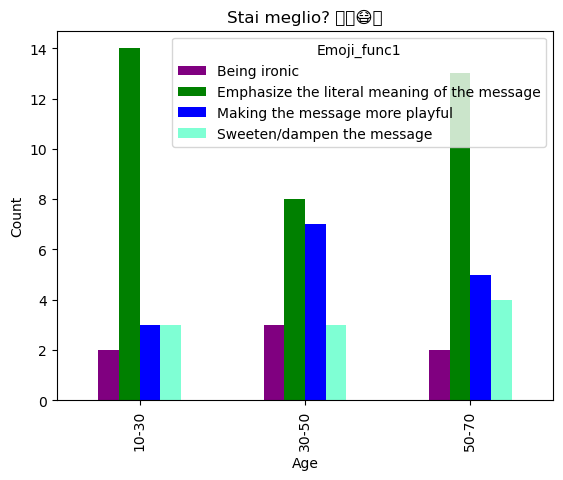

In [87]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emoji_func1']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stai meglio? 🤕🤧😷🙏')

# Mostra il grafico
plt.show()

In [88]:
socio_emoji.groupby(['Age'])['Emoji_func2'].value_counts()

Age    Emoji_func2                                 
10-30  Sweeten/dampen the message                      19
       Emphasize the literal meaning of the message     2
       Making the message more playful                  1
30-50  Sweeten/dampen the message                      18
       Emphasize the literal meaning of the message     2
       Being ironic                                     1
50-70  Sweeten/dampen the message                      14
       Emphasize the literal meaning of the message     7
       Making the message more playful                  3
Name: Emoji_func2, dtype: int64

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


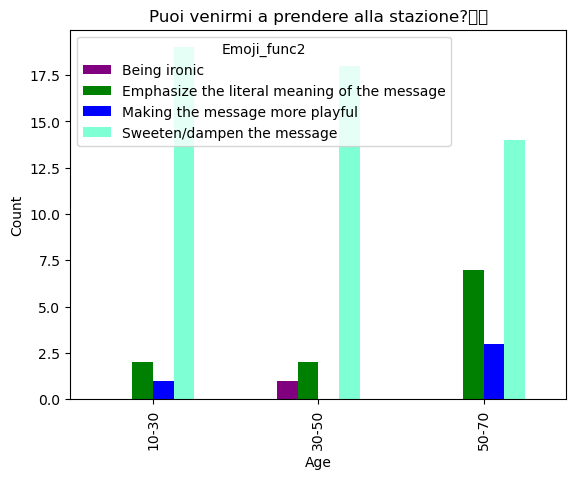

In [89]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emoji_func2']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Puoi venirmi a prendere alla stazione?💕💕')

# Mostra il grafico
plt.show()

In [90]:
socio_emoji.groupby(['Age'])['Emoji_func3'].value_counts()

Age    Emoji_func3                                 
10-30  Making the message more playful                 13
       Emphasize the literal meaning of the message     5
       Being ironic                                     3
       Sweeten/dampen the message                       1
30-50  Making the message more playful                  8
       Being ironic                                     6
       Emphasize the literal meaning of the message     5
       Sweeten/dampen the message                       2
50-70  Being ironic                                     8
       Making the message more playful                  7
       Emphasize the literal meaning of the message     5
       Sweeten/dampen the message                       4
Name: Emoji_func3, dtype: int64

C:\Users\lucre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129761 (\N{SALUTING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


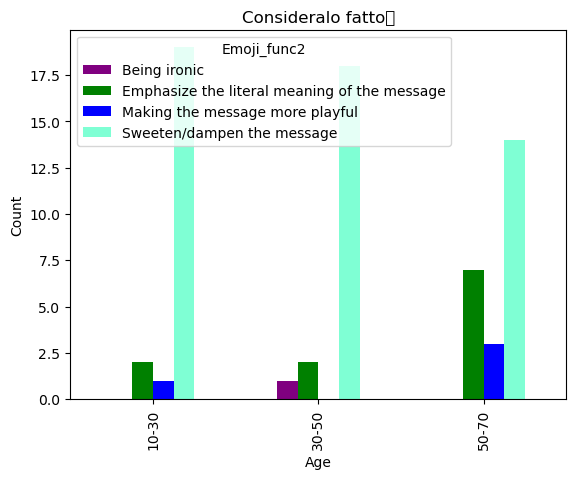

In [91]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emoji_func2']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Consideralo fatto🫡')

# Mostra il grafico
plt.show()

In [92]:
socio_emoji.groupby(['Age'])['Emoji_func_final'].value_counts()

Age    Emoji_func_final
10-30  No                  21
       Yes                  1
30-50  No                  20
       Yes                  1
50-70  No                  18
       Yes                  6
Name: Emoji_func_final, dtype: int64

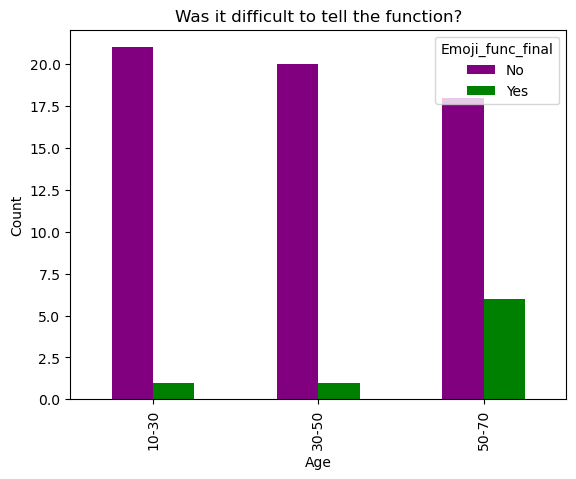

In [93]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Emoji_func_final']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Was it difficult to tell the function?')

# Mostra il grafico
plt.show()

### Online language

In [94]:
print("Question: The language you use in messages is... compared to what you usually use")
socio_emoji.groupby(['Age'])['Opinion1'].value_counts()

Question: The language you use in messages is... compared to what you usually use


Age    Opinion1   
10-30  The same       14
       Less formal     7
       More formal     1
30-50  The same       10
       Less formal     8
       More formal     3
50-70  Less formal    10
       The same        9
       More formal     5
Name: Opinion1, dtype: int64

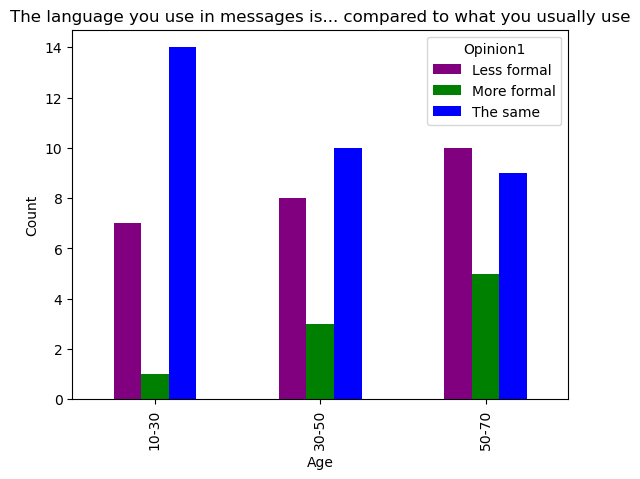

In [95]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Opinion1']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('The language you use in messages is... compared to what you usually use')

# Mostra il grafico
plt.show()

In [96]:
print("Question: If someone makes a grammatical mistake in a message")
socio_emoji.groupby(['Age'])['Opinion2'].value_counts()

Question: If someone makes a grammatical mistake in a message


Age    Opinion2                                                  
10-30  It's not a problem as long as I can understand the message    13
       It bothers me                                                  7
       I don't mind                                                   2
30-50  It bothers me                                                 12
       It's not a problem as long as I can understand the message     9
50-70  It bothers me                                                 19
       It's not a problem as long as I can understand the message     5
Name: Opinion2, dtype: int64

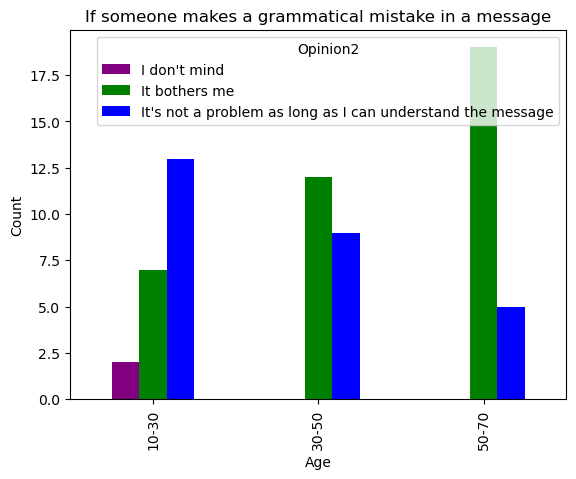

In [97]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Opinion2']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('If someone makes a grammatical mistake in a message')

# Mostra il grafico
plt.show()

In [98]:
print("Question: Do you think that people who use social media a lot write worse than those who don't use them?")
socio_emoji.groupby(['Age'])['Opinion3'].value_counts()

Question: Do you think that people who use social media a lot write worse than those who don't use them?


Age    Opinion3    
10-30  No              14
       I don't know     4
       Yes              4
30-50  I don't know     8
       No               7
       Yes              6
50-70  No               9
       Yes              9
       I don't know     6
Name: Opinion3, dtype: int64

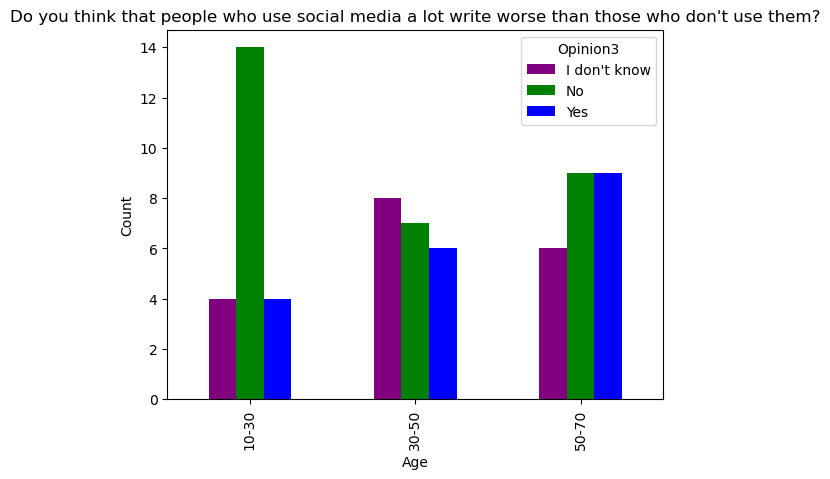

In [99]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Opinion3']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Do you think that people who use social media a lot write worse than those who don\'t use them?')

# Mostra il grafico
plt.show()

In [100]:
print("Question: Do you think you can talk about anything over text?")
socio_emoji.groupby(['Age'])['Opinion4'].value_counts()

Question: Do you think you can talk about anything over text?


Age    Opinion4                                        
10-30  No, I prefer to talk about some things in person    19
       Yes, I always use messages to communicate            2
       I don't know                                         1
30-50  No, I prefer to talk about some things in person    19
       I don't know                                         1
       Yes, I always use messages to communicate            1
50-70  No, I prefer to talk about some things in person    23
       I don't know                                         1
Name: Opinion4, dtype: int64

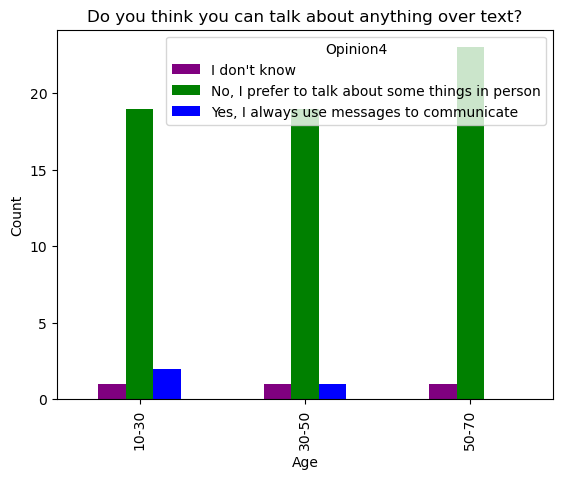

In [101]:
conteggi_per_eta = socio_emoji.groupby(['Age', 'Opinion4']).size().unstack()

# Colori per le colonne
colori = ['purple', "green", "blue", "aquamarine"]  # Aggiungi altri colori se necessario


# Creazione del bar chart con colori diversi per ciascuna età
conteggi_per_eta.plot(kind='bar', color=colori)

# Aggiunta di etichette al grafico
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Do you think you can talk about anything over text?')

# Mostra il grafico
plt.show()

In [102]:
socio_emoji.groupby(['Age'])['Laugh'].value_counts()

Age    Laugh                                           
10-30  Ridere                                              3
       Risata                                              3
       Divertente                                          2
       AHAHHAHAH                                           1
       Fa molto ridere/intercalare                         1
       Felice                                              1
       Ironico                                             1
       Mi fa ridere                                        1
       Ridere a crepapelle                                 1
       Ridere tanto                                        1
       Risata                                              1
       Risata sincera                                      1
       divertente                                          1
       ironico                                             1
       mi fa ridere                                        1
       risata                

In [103]:
res = socio_emoji.groupby(['Age'])['Reverse'].value_counts()
with open('output.txt', 'w') as file:
    file.write(res.to_string())

In [104]:
socio_emoji.groupby(['Age'])['Smiley'].value_counts()

Age    Smiley                                                                                                                      
10-30  Felice                                                                                                                          2
       Felice                                                                                                                          2
       Felice ma non troppo                                                                                                            1
       Finta soddisfazione                                                                                                             1
       Imbarazzato                                                                                                                     1
       Ironia                                                                                                                          1
       Lo utilizzo per essere formale/quando s

In [105]:
socio_emoji.groupby('Age')['Melted'].value_counts()

Age    Melted                                              
10-30  Mi sciolgo                                              2
       Annoiato                                                1
       Avere caldo o essere stanchissimi                       1
       Bene ma non benissimo ! Aiutoo                          1
       Fa caldo o rido per non piangere malissimo              1
       Fa caldo, sto sciogliendo                               1
       Imbarazzo                                               1
       Lo uso per dire che qualcuno è particolarmente bello    1
       Mi cascano le braccia                                   1
       Mi sciolgo ma in senso anche di “sono stanco”           1
       Mi sto per sciogliere                                   1
       Moiooo/ vorrei sotterrarmi                              1
       Non lo so                                               1
       Stanca                                                  1
       Stanchezza, frustrazion

In [106]:
socio_emoji.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 3 to 94
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               67 non-null     object
 1   Emotion_rank_1    67 non-null     object
 2   Emotion_rank_2    67 non-null     object
 3   Emotion_rank_3    67 non-null     object
 4   Emotion_rank_4    67 non-null     object
 5   Emotion_rank_5    67 non-null     object
 6   Emotion_rank_6    67 non-null     object
 7   Emotion_rank_7    67 non-null     object
 8   Emoji_func1       67 non-null     object
 9   Emoji_func2       67 non-null     object
 10  Emoji_func3       67 non-null     object
 11  Emoji_func_final  67 non-null     object
 12  Opinion1          67 non-null     object
 13  Opinion2          67 non-null     object
 14  Opinion3          67 non-null     object
 15  Opinion4          67 non-null     object
 16  Laugh             67 non-null     object
 17  Reverse           